# k-Means Clustering

In this notebook, you will implement the k-means clustering algorithm.

## Packages

Following packages is all you need. Do not import any additional packages!

In case you are not familiar with [Numpy](http://www.numpy.org/) library, it provides support for large multi-dimensional arrays and matrices, along with functions to operate on these. [Matplotlib](https://matplotlib.org/) is a plotting library.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## Function

A function for plotting that we are going to use later on.

In [2]:
def plot_clusters(data, centroids):
    """
    Shows a scatter plot with the data points clustered according to the centroids.
    """
    # Assigning the data points to clusters/centroids.
    clusters = [[] for _ in range(centroids.shape[0])]
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters[np.argmin(distances)].append(data[i])

    # Plotting clusters and centroids.
    fig, ax = plt.subplots()
    for c in range(centroids.shape[0]):
        if len(clusters[c]) > 0:
            cluster = np.array(clusters[c])
            ax.scatter(cluster[:, 0], cluster[:, 1], s=7)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

## Data

Let us generate a dataset you are going to play with. We will stay in the Euclidean space because it is easy to plot.

In [3]:
# We would like to have some control over the randomly generated data.
# This is just for development purposes.
np.random.seed(0)

# Euclidean space.
DIMENSIONS = 2

# We will generate clusters.
CLUSTERS = [
    {
        'mean': (50, 50),
        'std': (5, 10),
        'size': 300
    },
    {
        'mean': (10, 85),
        'std': (10, 3),
        'size': 100
    },
    {
        'mean': (10, 10),
        'std': (6, 6),
        'size': 200
    },
    {
        'mean': (10, 75),
        'std': (10, 5),
        'size': 200
    },
    {
        'mean': (80, 20),
        'std': (5, 5),
        'size': 100
    }
]

# Initializing the dataset with zeros.
synthetic_data = np.zeros((np.sum([c['size'] for c in CLUSTERS]), DIMENSIONS))

# Generating the clusters.
start = 0
for c in CLUSTERS:
    for d in range(DIMENSIONS):
        synthetic_data[start:start + c['size'], d] = np.random.normal(c['mean'][d], c['std'][d], (c['size']))
    start += c['size']
print(synthetic_data)

[[58.82026173 36.93473148]
 [52.00078604 66.5813068 ]
 [54.89368992 48.81835955]
 ...
 [80.85621773 20.91725127]
 [80.19454353 17.64628751]
 [83.13282125 21.36398195]]


In [4]:
print('shape (size, dimensions) =', synthetic_data.shape)

shape (size, dimensions) = (900, 2)


And this is how our data look like when plotted.

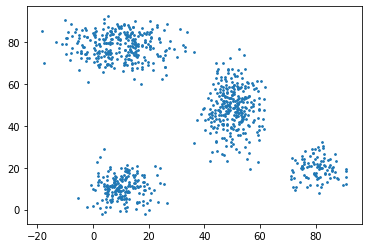

In [5]:
plt.figure()
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=3)

## Implementation

A human can with an ease find four distinct clusters just by watching the plot. A computer, however, needs to be told how to find the clusters.

**Exercise:**

Implement the k-means clustering algorithm.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [6]:
#I have implemented kmeans from scratch in the course IMT4204 Intrusion detection Autounmn 21. I reuse the util functions I wrote there below.

### Start UTIL functions ### 

def euclidean_distances(vectors, point):
    """ Calculates distances for all vectors to the point
        Eqvivalent to sqrt((xa-xb)^2 + (ya-yb)^2 + (za-zb)^2)"""
    # Uses this numpy method instead of manual calculation to avoid handling of n dimensions
    return np.linalg.norm(vectors - point, axis=1)


def calculate_distances(vectors, centroids):
    """ Calculate all distances for all vectors to all centroids.\n
    Example: nVectors=4, nClusters=3:
         [[d1, d2, d3], [d4, d5, d6], [d7, d8, d9], [d10, d11, d12]]"""
    n_vectors = vectors.shape[0]
    n_clusters = centroids.shape[0]

    distances = np.zeros((n_vectors, n_clusters))
    for cluster_index, centroid in enumerate(centroids):
        distances[:, cluster_index] = euclidean_distances(vectors, centroid)
    return distances


def label_by_cluster_index(distances):
    """ Assigns labels to each vector based on the distances to all the clusters\n
    The returned labels are 1:1 related to the vectors used to calculate the input distances.
    @param
        distances: 2D numpy array of distances to all clusters\n
    Used in combination with function 'calculate_distances'\n
    @Example:
    in : [[2, 3, 4], [8, 7, 6]]
    out: [0        ,        2 ]
    """
    return distances.argmin(axis=1)


def calculate_means(n_centroids, vectors, labels):
    """ Calculates the means for a given set of labeled vectors.
    vectors and labels are 1:1 on each index"""
    new_centroids = np.zeros((n_centroids, vectors.shape[1]))
    for i in range(0, n_centroids):
        cluster_vectors = vectors[labels == i, :]
        if len(cluster_vectors) == 0:
            raise EmptyClusterException(i)
        new_centroids[i] = np.mean(cluster_vectors, axis=0)
    return new_centroids

### end UTIL functions ### 

def kmeans(data, initial_centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        initial centroids
    :return
        final centroids
    """
    ### START CODE HERE ### 
    n_clusters = initial_centroids.shape[0]

    centroids = np.copy(initial_centroids)
    
    iteration = 0
    max_iterations = 100
    while iteration <= max_iterations:
        iteration += 1

        
        all_distances = calculate_distances(data, centroids)
        labels = label_by_cluster_index(all_distances)

        
        new_centroids = calculate_means(n_clusters, data, labels)

        if np.array_equal(centroids, new_centroids):
            break

        centroids = new_centroids
    
    ### END CODE HERE ### 
    return centroids

We have prepared for you a small piece of code, so that you can test that the function works according the expectations.

c0 = [10.60838779 23.74997384]
c1 = [49.02859109 49.15205809]
c2 = [76.15408829 21.7746025 ]


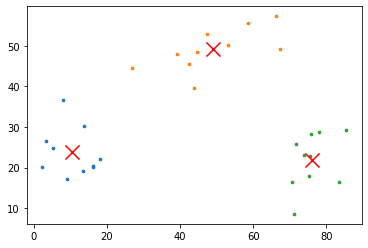

In [7]:
test_data = np.array([
    [66.24345364, 57.31053969],
    [43.88243586, 39.69929645],
    [44.71828248, 48.38791398],
    [39.27031378, 48.07972823],
    [58.65407629, 55.66884721],
    [26.98461303, 44.50054366],
    [67.44811764, 49.13785896],
    [42.38793099, 45.61070791],
    [53.19039096, 50.21106873],
    [47.50629625, 52.91407607],
    [2.29566576, 20.15837474],
    [18.01306597, 22.22272531],
    [16.31113504, 20.1897911 ],
    [13.51746037, 19.08356051],
    [16.30599164, 20.30127708],
    [5.21390499, 24.91134781],
    [9.13976842, 17.17882756],
    [3.44961396, 26.64090988],
    [8.12478344, 36.61861524],
    [13.71248827, 30.19430912],
    [74.04082224, 23.0017032 ],
    [70.56185518, 16.47750154],
    [71.26420853, 8.57481802],
    [83.46227301, 16.50657278],
    [75.25403877, 17.91105767],
    [71.81502177, 25.86623191],
    [75.95457742, 28.38983414],
    [85.50127568, 29.31102081],
    [75.60079476, 22.85587325],
    [78.08601555, 28.85141164]
])
test_centroids = np.array([
    [25, 50],
    [50, 50],
    [75, 50]
])

test_centroids = kmeans(test_data, test_centroids)

print('c0 =', test_centroids[0])
print('c1 =', test_centroids[1])
print('c2 =', test_centroids[2])
plot_clusters(test_data, test_centroids)

We expect the output to be similar to following.

```
c0 = [ 9 25]
c1 = [50 50]
c2 = [75 20]
```

If it is not the case, review your implementation, debug your algorithm, try it on paper, ...

## Clustering

Ready to run your implementation of k-means clustering on the dataset? Let's do it...

First, we need to initialize the centroids. We will go for a random initialization eventhough there are some disadvantages of doing so (see the Introduction to Data Mining from Tan et al.).

c0 = [32.  1.]
c1 = [75.  6.]
c2 = [65. 88.]
c3 = [16. 80.]


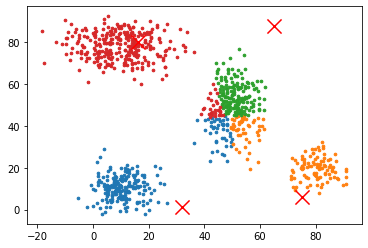

In [8]:
# Number of clusters.
K = 4

# Boundaries of our data.
x_min = np.min(synthetic_data[:, 0])
x_max = np.max(synthetic_data[:, 0])
y_min = np.min(synthetic_data[:, 1])
y_max = np.max(synthetic_data[:, 1])

# Generating random centroids within the data boundaries.
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Finally, we run the `kmeans()` function you have implemented.

c0 = [10.40705505 10.57646643]
c1 = [79.6476723  19.74229223]
c2 = [50.06781387 48.89278837]
c3 = [ 9.55339231 78.22785577]


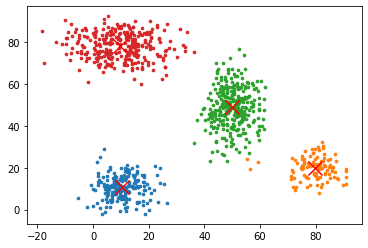

In [9]:
centroids = kmeans(synthetic_data, centroids)

# plt.scatter(data[:, 0], data[:, 1], s=3)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Congratulations! At this point, hopefully, you have found all four distinct clusters with the centroids aligned in their centers.

## Evaluation of Clustering

Silhouette Coefficient is an example of a measure for validation of the cluster quality.

**Exercise:**

Implement a function calculating the mean Silhouette Coefficient of all samples.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [12]:
def avarage_distances_inside_cluster(vectors, labels):
    avarage_distances = np.zeros(vectors.shape[0])
    for i, vector in enumerate(vectors):
        cluster_vectors = vectors[labels == labels[i], :]
        cluster_size = cluster_vectors.shape[0] 
        distances = euclidean_distances(cluster_vectors, vector)
        avarage_distances[i] = np.sum(distances) / (cluster_size - 1) # important to have -1 cluster size
    return avarage_distances

def min_avarage_distances_to_other_cluster(vectors, labels, n_clusters):
    avarage_min_distances = np.zeros(vectors.shape[0])
    for i, vector in enumerate(vectors):
        avarage_distance_to_other_clusters = np.zeros(n_clusters -1)
        index = 0
        for j in range(0, n_clusters):
            if labels[i] == j:
                #do not calculate distances to vectors in its own cluster
                continue
            other_cluster_vectors = vectors[labels == j, :]
            cluster_size = other_cluster_vectors.shape[0] 
            distances = euclidean_distances(other_cluster_vectors, vector)
            avarage_distance_to_other_clusters[index] = np.sum(distances) / cluster_size
            index += 1
        avarage_min_distances[i] = avarage_distance_to_other_clusters.min()
    return avarage_min_distances


def silhouette_score(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        centroids
    :return
        mean Silhouette Coefficient of all samples
    """
    ### START CODE HERE ### 
    n_clusters = centroids.shape[0]
    all_distances_to_centroids = calculate_distances(data, centroids)
    labels = label_by_cluster_index(all_distances_to_centroids)
     
    #avarage distance to all other data points in the same cluster
    a = avarage_distances_inside_cluster(data, labels)
    print("a", a)

    #minimum avarage distance from a data point to all other clusters
    b = min_avarage_distances_to_other_cluster(data, labels, n_clusters)
    
    s = (b-a)/np.maximum(a,b)
    
    score = np.mean(s)

    ### END CODE HERE ### 
    return score

First, let's see if the algorithm executes on the test data.

In [13]:
silhouette_score(test_data, test_centroids)

a [22.03004887 16.14495417 12.41267933 14.77234115 16.54708532 25.39629375
 21.79669007 13.42272497 13.16938065 12.99841829 11.93790281 10.17595481
  9.18906176  8.86324506  9.15331563  9.56505324 10.11277914 10.94516057
 15.66046537 11.01243036  7.76321179 10.88754223 16.27366131 12.52837679
  8.81948969  9.41686047  9.5422532  14.35304633  7.59709015 10.08877528]


0.6752214860168544

We expect the output to be around `0.675`.

Finally, let's cluster again our synthetic data and calculate the Silhouette Coefficient.

In [ ]:
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

centroids = kmeans(synthetic_data, centroids)
silhouette_coefficient = silhouette_score(synthetic_data, centroids)

print('silhouette_coefficient =', silhouette_coefficient)
plot_clusters(synthetic_data, centroids)

**Exercise:**

* Run the clustering multiple times and pay attention to the results.
* In the *Discussion* below, describe your observations and discuss reasons for the possibly strong or weak performance of the algorithm. If you identify any weaknesses, suggest a possible solution.

## Discussion

Multiple executions reveal the varying clustering quality. This is due to the randomly initialized centroids and the sensitivity of the k-means algorithm to it. I.e. the cluster quality depends highly on the initial centroids.

## Comments

Our k-means clustering implementation can be characterized as a naive. This is for following reasons:

* We are evaluating only one `k` value instead of trying multiple.
* We are initializing the centroids randomly instead of using some heuristic.
* We are initializing and evaluating only one set of centroids instead of initializing multiple sets and analyzing their SSE (Sum of Squared Errors) or Silhouette Coefficient.

✌️